<a href="https://colab.research.google.com/github/Sai-Pranav2503/CGT_Assignment/blob/main/CGT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of vertices: 6

Adjacency Matrix of K6: 
[0, 26, 30, 25, 23, 30]
[26, 0, 24, 25, 32, 33]
[30, 24, 0, 28, 25, 20]
[25, 25, 28, 0, 35, 28]
[23, 32, 25, 35, 0, 22]
[30, 33, 20, 28, 22, 0]

Graph: 


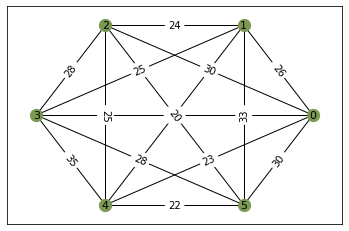


---------------------------------------------

MST using Prim's Algo: 

Edge: Weight
0-4: 23
4-5: 22
5-2: 20
2-1: 24
0-3: 25




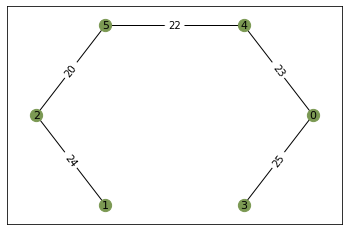


---------------------------------------------

MST using Kruskal's Algo: 

Edge: Weight
2-5: 20
4-5: 22
0-4: 23
1-2: 24
0-3: 25

Minimal spanning tree cost: 114 



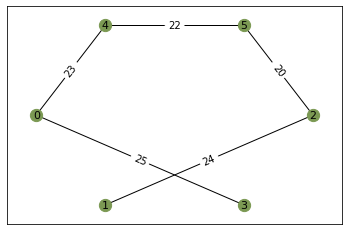


---------------------------------------------

Minimum Hamiltonian cycle using Approx Algo:
0 -> 3 -> 4 -> 5 -> 2 -> 1 -> 0
Length of min hamiltonian cycle: 152




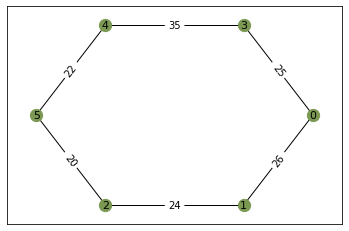

In [47]:
##Main CGT Project File

import networkx as nx
import matplotlib.pyplot as plt

class Graph_plot:
    
    def __init__(self):
        self.edgelist=[]        

    def addEdge(self,a,b,wt):
        t=[a,b,wt]
        self.edgelist.append(t)

    def plot(self):
        G = nx.Graph()
        for i in self.edgelist:
            G.add_edge(i[0],i[1],weight=i[2])
        pos=nx.circular_layout(G)
        nx.draw_networkx_nodes(G, pos, node_size=150, node_color = "#7b9953")
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos, font_size=11, font_family="sans-serif", font_color="k")
        edge_labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G,pos,edge_labels,font_size=10)
        plt.show()

import random

V = int(input("Enter the number of vertices: "))
print("\nAdjacency Matrix of K{}: ".format(V))
l=[]
for i in range(V):
    l1 = []
    for j in range(V):
        if i == j:
            l1.append(0)
        else :
            l1.append(1)
    l.append(l1)

a = random.randint(3, 30)
w = l

for i in range(V):
  for j in range(i,V):
    if i != j:
      w[i][j]=random.randint(a, 2*a -5)
      w[j][i]=w[i][j]
for l in w:
  print(l)

G = []
graph = []
for i in range(V):
    l=[]
    for j in range(V):
        if w[i][j]!=0:
            l.append(1)
            G.append([i,j,w[i][j]])
        else:
            l.append(0)
    graph.append(l)
print("\nGraph: ")
gp = Graph_plot()
for i in range(len(G)):
    gp.addEdge(G[i][0],G[i][1],G[i][2])
gp.plot()
print("\n---------------------------------------------\n")

#Prim
prim_mst=[]
def Prim(G, v):
    Infinity = 9999999
    chosen = [0]*v
    no_edge = 0
    chosen[0] = True
    print("MST using Prim's Algo: \n")
    print("Edge: Weight")
    while (no_edge < v - 1):
        min = Infinity
        x = 0
        y = 0
        for i in range(v):
            if  chosen[i]:
                for j in range(v):
                    if ((not chosen[j]) and G[i][j]):  
                        if min > G[i][j]:
                            min = G[i][j]
                            x = i
                            y = j
        print(str(x) + "-" + str(y) + ": " + str(G[x][y]))
        prim_mst.append([str(x), str(y), str(G[x][y])])
        chosen[y] = True
        no_edge += 1

Prim(w, V)
print("\n")
MST1 = Graph_plot()
for i in range(len(prim_mst)):
    MST1.addEdge(prim_mst[i][0],prim_mst[i][1],prim_mst[i][2])
MST1.plot()
print("\n---------------------------------------------\n")

def search(p, i):
    if p[i] == i:
        return i
    return search(p, p[i])

def Insert(p, position, x, y):
        a = search(p, x)
        b = search(p, y)
        if position[a] < position[b]:
            p[a] = b
        elif position[a] > position[b]:
            p[b] = a
        else:
            p[b] = a
            position[a] += 1

tree_size = 0
kruskal_mst=[]
def Kruskal(G, v):
        result = []
        i, e = 0, 0
        global tree_size
        graph = sorted(G, key=lambda item: item[2])
        p = []
        position = []
        print("MST using Kruskal's Algo: \n")
        print("Edge: Weight")
        for node in range(v):
            p.append(node)
            position.append(0)
        while e < v - 1:
            u, v1, w = graph[i]
            i = i + 1
            x = search(p, u)
            y = search(p, v1)
            if x != y:
                e = e + 1
                result.append([u, v1, w])
                Insert(p, position, x, y)
        for u, v1, weight in result:
            print("%d-%d: %d" % (u, v1, weight))
            kruskal_mst.append([u,v1,weight])

        global mst
        mst=[]
        for i in range(V):
            l=[]
            for j in range(V):
                l.append(0)
            mst.append(l)
        for u, v, weight in result:
            
            mst[u][v]=1
            mst[v][u]=1
            tree_size += weight
        
        return tree_size
    
Kruskal(G, V)
print("\nMinimal spanning tree cost:", tree_size, '\n')

MST2 = Graph_plot()
for i in range(len(kruskal_mst)):
    MST2.addEdge(kruskal_mst[i][0],kruskal_mst[i][1],kruskal_mst[i][2])
MST2.plot()
print("\n---------------------------------------------\n")

def dfs(graph,vertex,path=[]):
        path+=[vertex]
        for neighbor in graph[vertex]:
            if neighbor not in path:
                path=dfs(graph,neighbor,path)
        return path

Ham_l=[]
def MinHam_ApproxAlgo():
    al= {} 
    for x, row in enumerate(mst):
        al[x+1]=[]
        for i, v in enumerate(row):
            if v== 1 and i!=x:
                al[x+1].append(i+1)
    l=dfs(al, 1)

    print("Minimum Hamiltonian cycle using Approx Algo:")
    cost=0
    for i in range(V-1) :
        cost+=w[l[i]-1][l[i+1]-1]
        print(l[i]-1,"->",end=" ")
        Ham_l.append([l[i]-1, l[i+1]-1, w[l[i]-1][l[i+1]-1]])
    
    cost+=w[l[V-1]-1][0]
    print(l[V-1]-1,"->",l[0]-1)
    Ham_l.append([l[V-1]-1, l[0]-1, w[l[V-1]-1][l[0]-1]])
    print("Length of minimum Hamiltonian cycle:", cost)

MinHam_ApproxAlgo()
print("\n")
Ham = Graph_plot()
for i in range(len(Ham_l)):
  Ham.addEdge(Ham_l[i][0], Ham_l[i][1], Ham_l[i][2])
Ham.plot()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


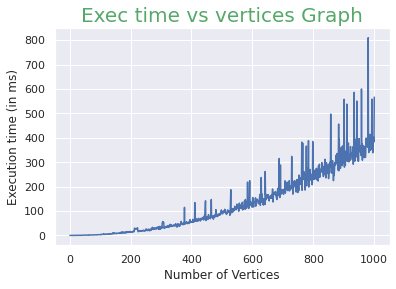

In [11]:
## Execution time for TSP with Approx_Algo (in ms) vs Number of Vertices

import random
import time
import matplotlib.pyplot as plt
import numpy as np

input_l=np.empty((0), int)
MinHam_l = np.empty((0), float)

for V in range(1, 1001):
  l=[]
  for i in range(V):
      l1 = []
      for j in range(V):
          if i == j:
              l1.append(0)
          else :
              l1.append(1)
      l.append(l1)

  a = random.randint(3, 30)
  w = l

  for i in range(V):
    for j in range(i,V):
      if i != j:
        w[i][j]=random.randint(a, 2*a -1)
        w[j][i]=w[i][j]

  G = []
  graph = []
  for i in range(V):
      l=[]
      for j in range(V):
          if w[i][j]!=0:
              l.append(1)
              G.append([i,j,w[i][j]])
          else:
              l.append(0)
      graph.append(l)

  input_l = np.append(input_l, V)
  print(V)

  start_MinHam = time.time()

  def search(p, i):
      if p[i] == i:
          return i
      return search(p, p[i])

  def Insert(p, position, x, y):
          a = search(p, x)
          b = search(p, y)
          if position[a] < position[b]:
              p[a] = b
          elif position[a] > position[b]:
              p[b] = a
          else:
              p[b] = a
              position[a] += 1

  tree_size = 0
  def Kruskal(G, v):
          result = []
          i, e = 0, 0
          global tree_size
          graph = sorted(G, key=lambda item: item[2])
          p = []
          position = []
          for node in range(v):
              p.append(node)
              position.append(0)
          while e < v - 1:
              u, v1, w = graph[i]
              i = i + 1
              x = search(p, u)
              y = search(p, v1)
              if x != y:
                  e = e + 1
                  result.append([u, v1, w])
                  Insert(p, position, x, y)

          global mst
          mst=[]
          for i in range(V):
              l=[]
              for j in range(V):
                  l.append(0)
              mst.append(l)
          for u, v, weight in result:
              
              mst[u][v]=1
              mst[v][u]=1
              tree_size += weight
          
          return tree_size
      
  Kruskal(G, V)
  
  def dfs(graph,vertex,path=[]):
          path+=[vertex]
          for neighbor in graph[vertex]:
              if neighbor not in path:
                  path=dfs(graph,neighbor,path)
          return path

  def MinHam_ApproxAlgo():
      al= {} 
      for x, row in enumerate(mst):
          al[x+1]=[]
          for i, v in enumerate(row):
              if v== 1 and i!=x:
                  al[x+1].append(i+1)
      l=dfs(al, 1)

      cost=0
      for i in range(V-1) :
          cost+=w[l[i]-1][l[i+1]-1]
      cost+=w[l[V-1]-1][0]

  MinHam_ApproxAlgo()
  end_MinHam = time.time()
  t_MinHam = end_MinHam - start_MinHam
  MinHam_l = np.append(MinHam_l, t_MinHam *1000)


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.plot(input_l, MinHam_l)
plt.xlabel('Number of Vertices')
plt.ylabel("Execution time (in ms)")
plt.title("Exec time vs vertices Graph", fontsize = '20', color = 'g')
plt.show()

1
2
3
4
5
6
7
8
9


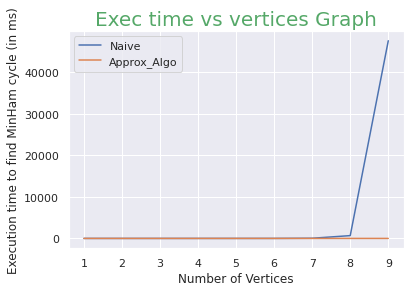

In [1]:
## Comparison between Naive and Approx_algo Time taken

import random
import time
Naive_l = []
input_l =[]
ApproxAlgo_l = []

for V in range(1, 10):

  l2=[]
  for i in range(V):
      l3 = []
      for j in range(V):
          if i == j:
              l3.append(0)
          else :
              l3.append(1)
      l2.append(l3)

  a = random.randint(3, 30)
  w = l2

  for i in range(V):
    for j in range(i,V):
      if i != j:
        w[i][j]=random.randint(a, 2*a - 1)
        w[j][i]=w[i][j]

  G = []
  graph = []
  input_l.append(V)
  print(V)
  for i in range(V):
      l=[]
      for j in range(V):
          if w[i][j]!=0:
              l.append(1)
              G.append([i,j,w[i][j]])
          else:
              l.append(0)
      graph.append(l)
  
  Naive_start = time.time()

  def isSafe(v, graph, path, pos):
    if graph[path[pos - 1]][v] == 0:
      return False
    for i in range(pos):
      if path[i] == v:
        return False
    return True

  hasCycle = False
  minwtsum=[]
  minwt=[]
  vertexlist=[]

  def hamCycle(graph):
    global hasCycle
    hasCycle = False
    path = []
    path.append(0)
    visited = [False]*(len(graph))

    for i in range(len(visited)):
      visited[i] = False

    visited[0] = True
    FindHamCycle(graph, 1, path, visited)
    if hasCycle:
      print("No Hamiltonian Cycle" + "possible ")
      return


  def FindHamCycle(graph, pos, path, visited):

    if pos == len(graph):
      if graph[path[-1]][path[0]] != 0:
        path.append(0)
        for i in range(len(path)):
          vertexlist.append(path[i])

          if(i<len(path)-1):
            minwt.append(w[path[i]][path[i+1]])

        minwtsum.append(sum(minwt))
        path.pop()
        hasCycle = True

      return

    for v in range(len(graph)):
      if isSafe(v, graph, path, pos) and not visited[v]:
        path.append(v)
        visited[v] = True
        FindHamCycle(graph, pos + 1, path, visited)
        visited[v] = False
        path.pop()

  hamCycle(graph)
  if(len(minwt)!=0):
      l=[]
      for i in range(0, len(minwt), V):
          q = minwt[i:i+V]
          q.append(sum(q))
          l.append(q)

      minimum = min(minwtsum)
      l1=[]

      for i in range(0, len(vertexlist), V+1):
          q = vertexlist[i:i+V+1]
          l1.append(q)
  Naive_end = time.time()
  t = Naive_end - Naive_start
  Naive_l.append(t * 1000)

  Start_t = time.time()
  def search(p, i):
      if p[i] == i:
          return i
      return search(p, p[i])

  def Insert(p, position, x, y):
          a = search(p, x)
          b = search(p, y)
          if position[a] < position[b]:
              p[a] = b
          elif position[a] > position[b]:
              p[b] = a
          else:
              p[b] = a
              position[a] += 1

  tree_size = 0
  kruskal_mst=[]
  def Kruskal(G, v):
          result = []
          i, e = 0, 0
          global tree_size
          graph = sorted(G, key=lambda item: item[2])
          p = []
          position = []
          for node in range(v):
              p.append(node)
              position.append(0)
          while e < v - 1:
              u, v1, w = graph[i]
              i = i + 1
              x = search(p, u)
              y = search(p, v1)
              if x != y:
                  e = e + 1
                  result.append([u, v1, w])
                  Insert(p, position, x, y)
          for u, v1, weight in result:
              kruskal_mst.append([u,v1,weight])

          global mst
          mst=[]
          for i in range(V):
              l=[]
              for j in range(V):
                  l.append(0)
              mst.append(l)
          for u, v, weight in result:
              
              mst[u][v]=1
              mst[v][u]=1
              tree_size += weight
          
          return tree_size
      
  Kruskal(G, V)

  def dfs(graph,vertex,path=[]):
          path+=[vertex]
          for neighbor in graph[vertex]:
              if neighbor not in path:
                  path=dfs(graph,neighbor,path)
          return path

  Ham_l=[]
  def MinHam_ApproxAlgo():
      al= {} 
      for x, row in enumerate(mst):
          al[x+1]=[]
          for i, v in enumerate(row):
              if v== 1 and i!=x:
                  al[x+1].append(i+1)
      l=dfs(al, 1)

      cost=0
      for i in range(V-1) :
          cost+=w[l[i]-1][l[i+1]-1]
          Ham_l.append([l[i]-1, l[i+1]-1, w[l[i]-1][l[i+1]-1]])
      
      cost+=w[l[V-1]-1][0]
      Ham_l.append([l[V-1]-1, l[0]-1, w[l[V-1]-1][l[0]-1]])

  MinHam_ApproxAlgo()
  End_t = time.time()
  t = End_t - Start_t
  ApproxAlgo_l.append(t*1000)


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.plot(input_l, Naive_l)
plt.plot(input_l, ApproxAlgo_l)
plt.xlabel('Number of Vertices')
plt.ylabel("Execution time to find MinHam cycle (in ms)")
plt.title("Exec time vs vertices Graph", fontsize = '20', color = 'g')
plt.legend(["Naive", "Approx_Algo"])
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


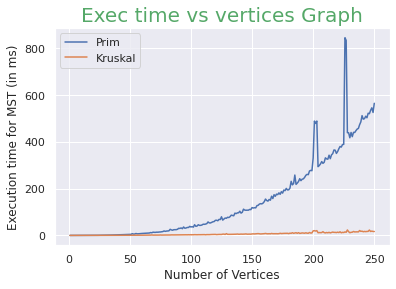

33.844356921671874


In [9]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

input_l=np.empty((0), int)
prim_l=np.empty((0), float)
kruskal_l=np.empty((0), float)

for V in range(1,251):
  l=[]
  for i in range(V):
      l1 = []
      for j in range(V):
          if i == j:
              l1.append(0)
          else :
              l1.append(1)
      l.append(l1)

  a = random.randint(3, 30)
  w = l

  for i in range(V):
    for j in range(i,V):
      if i != j:
        w[i][j]=random.randint(a, 2*a -1)
        w[j][i]=w[i][j]

  G = []
  graph = []
  for i in range(V):
      l=[]
      for j in range(V):
          if w[i][j]!=0:
              l.append(1)
              G.append([i,j,w[i][j]])
          else:
              l.append(0)
      graph.append(l)

  input_l = np.append(input_l, V)
  print(V)

  start_prim = time.time()
  def Prim(G, v):
      INF = 9999999
      selected = [0]*v
      no_edge = 0
      selected[0] = True
      while (no_edge < v - 1):
          minimum = INF
          x = 0
          y = 0
          for i in range(v):
              if selected[i]:
                  for j in range(v):
                      if ((not selected[j]) and G[i][j]):  
                          if minimum > G[i][j]:
                              minimum = G[i][j]
                              x = i
                              y = j
          selected[y] = True
          no_edge += 1

  Prim(w, V)

  end_prim = time.time()
  t_prim = end_prim - start_prim
  prim_l = np.append(prim_l, t_prim*1000)

  start_kruskal=time.time()
  start_MinHam = time.time()

  def search(p, i):
      if p[i] == i:
          return i
      return search(p, p[i])

  def Insert(p, position, x, y):
          a = search(p, x)
          b = search(p, y)
          if position[a] < position[b]:
              p[a] = b
          elif position[a] > position[b]:
              p[b] = a
          else:
              p[b] = a
              position[a] += 1

  tree_size = 0
  def Kruskal(G, v):
          result = []
          i, e = 0, 0
          global tree_size
          graph = sorted(G, key=lambda item: item[2])
          p = []
          position = []
          for node in range(v):
              p.append(node)
              position.append(0)
          while e < v - 1:
              u, v1, w = graph[i]
              i = i + 1
              x = search(p, u)
              y = search(p, v1)
              if x != y:
                  e = e + 1
                  result.append([u, v1, w])
                  Insert(p, position, x, y)

          global mst
          mst=[]
          for i in range(V):
              l=[]
              for j in range(V):
                  l.append(0)
              mst.append(l)
          for u, v, weight in result:
              
              mst[u][v]=1
              mst[v][u]=1
              tree_size += weight
          
          return tree_size
      
  Kruskal(G, V)

  end_kruskal = time.time()
  t_kruskal=end_kruskal - start_kruskal
  kruskal_l = np.append(kruskal_l, t_kruskal * 1000)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.plot(input_l, prim_l)
plt.plot(input_l, kruskal_l)
plt.xlabel('Number of Vertices')
plt.ylabel("Execution time for MST (in ms)")
plt.title("Exec time vs vertices Graph", fontsize = '20', color = 'g')
plt.legend(["Prim", "Kruskal"])
plt.show()
print(prim_l[-1]/kruskal_l[-1])